In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def quality_1(textiles):
    """
    Фильтрует датафрейм, получая первую группу тканей по качеству (плотность основы выше 25, плотность
    утка выше 15);
    """
    quality = textiles.copy(deep=True)
    quality = quality.query('warp_dens >= 25 and weft_dens >= 15')
    quality = quality.query('warp_nominal >= 0.2 and warp_nominal <= 0.4 and weft_nominal >= 0.2 and weft_nominal <= 0.5')
    return quality

def quality_2(textiles):
    """
    
    Фильтрует датафрейм, получая первую группу тканей по качеству (плотность основы выше 25, плотность
    утка выше 15);

    Parameters
    --------
    textiles : pandas DataFrame
    
    """
    quality = textiles.copy(deep=True)
    quality = quality.query('warp_dens >= 12')
    quality = quality.query('warp_dens < 25')
    quality = quality.query('weft_dens >= 9')
    quality = quality.query('weft_dens < 15')
    quality = quality.query('warp_nominal >= 0.2')
    quality = quality.query('warp_nominal <= 0.4')
    quality = quality.query('weft_nominal >= 0.2')
    quality = quality.query('weft_nominal <= 0.5')
    return quality

def quality_3(textiles, quality_one, quality_three):
    """
    """
    quality_three = pd.concat([textiles, quality_one]).drop_duplicates(keep=False)
    quality_three = pd.concat([textiles, quality_two]).drop_duplicates(keep=False)
    return quality

In [4]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;
    param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

#######################################################################################################################

In [5]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/dataframe.csv')


# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

In [6]:
quality_one = quality_1(textiles)
quality_two = quality_2(textiles)
quality_three = pd.concat([textiles, quality_one]).drop_duplicates(keep=False)
quality_three = pd.concat([textiles, quality_two]).drop_duplicates(keep=False)

In [7]:
print(len(quality_one))
print(len(quality_two))
print(len(quality_three))

3
32
272


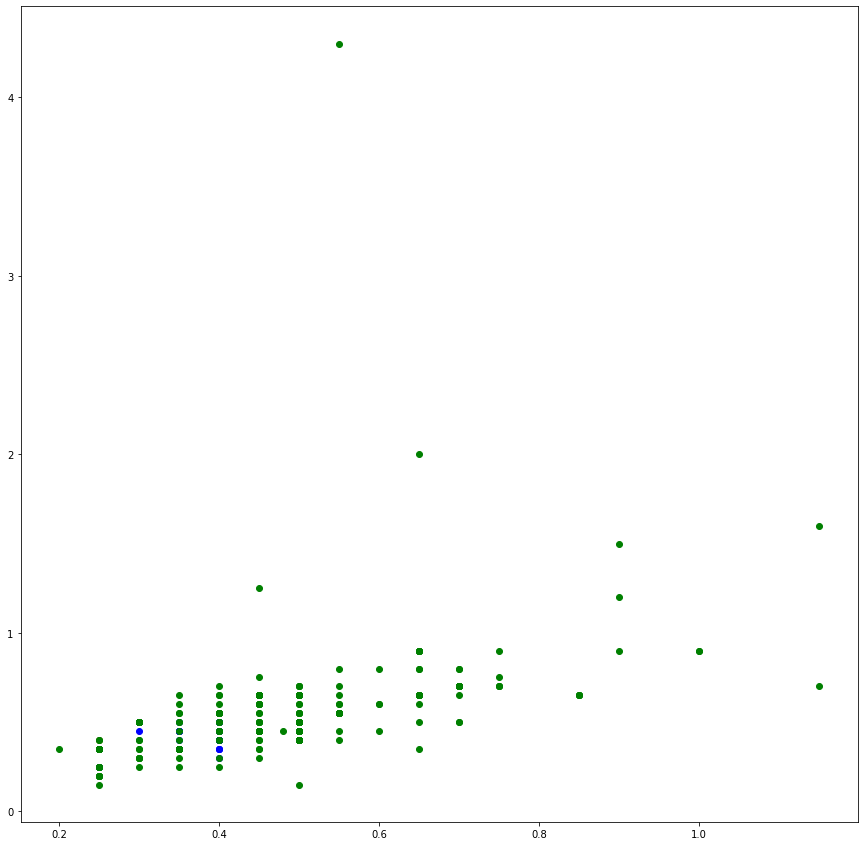

In [10]:
fig, ax = plt.subplots(figsize=[15, 15])

ax.scatter(quality_one['warp_nominal'].tolist(), quality_one['weft_nominal'].tolist(), color='coral')
ax.scatter(quality_two['warp_nominal'].tolist(), quality_two['weft_nominal'].tolist(), color='blue')
ax.scatter(quality_three['warp_nominal'].tolist(), quality_three['weft_nominal'].tolist(), color='green')

plt.show()